In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

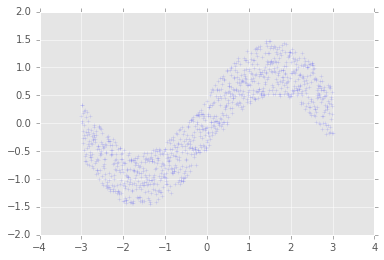

In [3]:
n_observations = 1000
sess = tf.InteractiveSession()
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [5]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

In [6]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')

Y_pred = X * W + B

In [7]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

cost = tf.reduce_mean(distance(Y_pred, Y))

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x119cb8ac8>>
Traceback (most recent call last):
  File "/Users/jaimec/anaconda/envs/py3k/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 522, in __del__
    self.close()
  File "/Users/jaimec/anaconda/envs/py3k/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 1262, in close
    self._default_session.__exit__(None, None, None)
  File "/Users/jaimec/anaconda/envs/py3k/lib/python3.5/contextlib.py", line 66, in __exit__
    next(self.gen)
  File "/Users/jaimec/anaconda/envs/py3k/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3536, in get_controller
    % type(default))
AssertionError: Nesting violated for default stack of <class 'weakref'> objects
/Users/jaimec/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so canno

1.02587
0.951689
0.879471
0.808422
0.740644
0.678445
0.621967
0.573842
0.534514
0.502609
0.477567
0.45831
0.443085
0.431847
0.423412
0.416877
0.411602
0.407131
0.403689
0.401418
0.399597
0.398287
0.397303
0.396446
0.395864
0.395438
0.395119
0.39489
0.394806
0.394725
0.39465
0.39461
0.394583
0.394558
0.394538


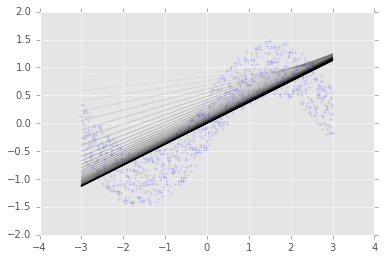

In [9]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')


with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost